In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special


import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

feature_index = 0

do_nn = False
#do_nn = True


fileset = 1

if do_nn :
    if fileset == 1 :
        input_dir1 = 'output-run-nn-study-nd-v0j-ndim1-res-sf-0.00'
        input_dir2 = 'output-run-nn-study-nd-v0j-ndim1-res-sf-0.50'
        input_dir3 = 'output-run-nn-study-nd-v0j-ndim1-res-sf-1.00'
        input_dir4 = 'output-run-nn-study-nd-v0j-ndim1-res-sf-1.50'
       
        
else:
    input_dir1 = 'output-run-kde-study-1d-v0c-res-sf-0.00'
    input_dir2 = 'output-run-kde-study-1d-v0c-res-sf-0.50'
    input_dir3 = 'output-run-kde-study-1d-v0c-res-sf-1.00'
    input_dir4 = 'output-run-kde-study-1d-v0c-res-sf-1.50'
    


hist_nbins = 40
#hist_nbins = 120


hist_xlow = -4.0
hist_xhigh = 4.0



with open( '%s/mc-and-true-samples.npy' % input_dir1, 'rb') as f :
    mc_pts1 = np.load(f)
    mc_det_pts1 = np.load(f)
    true_pts1 = np.load(f)
    true_det_pts1 = np.load(f)
    
print('\n\n')
print(' shape of mc_pts:  %s' % str(mc_pts1.shape))
print(' shape of true_pts:   %s' % str(true_pts1.shape))
print('\n\n')

with open( '%s/mc-and-true-samples.npy' % input_dir2, 'rb') as f :
    mc_pts2 = np.load(f)
    mc_det_pts2 = np.load(f)
    true_pts2 = np.load(f)
    true_det_pts2 = np.load(f)
    
with open( '%s/mc-and-true-samples.npy' % input_dir3, 'rb') as f :
    mc_pts3 = np.load(f)
    mc_det_pts3 = np.load(f)
    true_pts3 = np.load(f)
    true_det_pts3 = np.load(f)

with open( '%s/mc-and-true-samples.npy' % input_dir4, 'rb') as f :
    mc_pts4 = np.load(f)
    mc_det_pts4 = np.load(f)
    true_pts4 = np.load(f)
    true_det_pts4 = np.load(f)





 shape of mc_pts:  (100000, 1)
 shape of true_pts:   (10000, 1)





In [3]:
hist_bin_width = (hist_xhigh - hist_xlow)/hist_nbins

hist_bin_centers = np.linspace( hist_xlow + hist_bin_width/2, hist_xhigh - hist_bin_width/2, hist_nbins)

In [4]:
config_file = '%s/config.txt' % (input_dir1)

if not exists(config_file) :
    
    print("\n\n\n ******* Input file does not exist: %s\n\n\n" % config_file )
    sys.exit()
    

In [5]:
ndim = int(cu.get_par( config_file, "ndim"))
print("\n\n Number of feature dimensions: %d\n\n" % ndim)
ngen_true = int(cu.get_par( config_file, "ngen_true"))
print(' ngen_true = %d\n' % ngen_true )



 Number of feature dimensions: 1


 ngen_true = 10000



In [6]:
n_samples1 = 0
n_samples2 = 0
n_samples3 = 0
n_samples4 = 0

for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir1, fi)
    
    if exists(fname) :
        n_samples1 = n_samples1 + 1

for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir2, fi)
    
    if exists(fname) :
        n_samples2 = n_samples2 + 1
        
for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir3, fi)
    
    if exists(fname) :
        n_samples3 = n_samples3 + 1
        
for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir4, fi)
    
    if exists(fname) :
        n_samples4 = n_samples4 + 1
        
print("\n\n Found %d bootstrap samples in dir 1.\n\n" % n_samples1 )
print("\n\n Found %d bootstrap samples in dir 2.\n\n" % n_samples2 )

print("\n\n Found %d bootstrap samples in dir 3.\n\n" % n_samples3 )
print("\n\n Found %d bootstrap samples in dir 4.\n\n" % n_samples4 )






 Found 500 bootstrap samples in dir 1.




 Found 500 bootstrap samples in dir 2.




 Found 500 bootstrap samples in dir 3.




 Found 500 bootstrap samples in dir 4.




In [7]:
%%time


boot_hist_content1 = np.zeros( shape=(n_samples1, hist_nbins))
boot_hist_content2 = np.zeros( shape=(n_samples2, hist_nbins))
boot_hist_content3 = np.zeros( shape=(n_samples3, hist_nbins))
boot_hist_content4 = np.zeros( shape=(n_samples4, hist_nbins))



for bi in range(n_samples1) :
    
        
  #---
        
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir1, bi)

    if not exists(fname) :  
        print('\n\n *** Missing %s' % fname )
        continue

    with open(fname,'rb') as f :            

        final_push_weights_scaled1 = np.load(f)
        print(' boot1 %3d weights: ' % bi, end='')
        print( final_push_weights_scaled1)
        
        hist_content,_ = np.histogram( mc_pts1[:,feature_index], 
                                    bins=hist_nbins, 
                                    weights=final_push_weights_scaled1, range=[hist_xlow, hist_xhigh] )
        #print(hist_content)
        boot_hist_content1[bi,:] = hist_content


        
        
for bi in range(n_samples2) :
  #---
        
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir2, bi)

    if not exists(fname) :  
        print('\n\n *** Missing %s' % fname )
        continue

    with open(fname,'rb') as f :            

        final_push_weights_scaled2 = np.load(f)
        print(' boot2 %3d weights: ' % bi, end='')
        print( final_push_weights_scaled2)

        hist_content,_ = np.histogram( mc_pts2[:,feature_index], 
                                    bins=hist_nbins, 
                                    weights=final_push_weights_scaled2, range=[hist_xlow, hist_xhigh] )
        #print(hist_content)
        boot_hist_content2[bi,:] = hist_content

        
for bi in range(n_samples3) :
  #---
        
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir3, bi)

    if not exists(fname) :  
        print('\n\n *** Missing %s' % fname )
        continue

    with open(fname,'rb') as f :            

        final_push_weights_scaled3 = np.load(f)
        print(' boot3 %3d weights: ' % bi, end='')
        print( final_push_weights_scaled3)

        hist_content,_ = np.histogram( mc_pts3[:,feature_index], 
                                    bins=hist_nbins, 
                                    weights=final_push_weights_scaled3, range=[hist_xlow, hist_xhigh] )
        #print(hist_content)
        boot_hist_content3[bi,:] = hist_content

        
        
for bi in range(n_samples4) :
  #---
        
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir4, bi)

    if not exists(fname) :  
        print('\n\n *** Missing %s' % fname )
        continue

    with open(fname,'rb') as f :            

        final_push_weights_scaled4 = np.load(f)
        print(' boot4 %3d weights: ' % bi, end='')
        print( final_push_weights_scaled4)

        hist_content,_ = np.histogram( mc_pts4[:,feature_index], 
                                    bins=hist_nbins, 
                                    weights=final_push_weights_scaled4, range=[hist_xlow, hist_xhigh] )
        #print(hist_content)
        boot_hist_content4[bi,:] = hist_content

    

 boot1   0 weights: [0.11144978 0.09420962 0.10063428 ... 0.11019746 0.11724492 0.07901706]
 boot1   1 weights: [0.11216869 0.09193803 0.09610747 ... 0.11002561 0.12510328 0.07697496]
 boot1   2 weights: [0.12245477 0.08607845 0.0887585  ... 0.11424298 0.1104182  0.0811356 ]
 boot1   3 weights: [0.11795012 0.08726501 0.08478381 ... 0.11008761 0.11389917 0.08480219]
 boot1   4 weights: [0.1153699  0.08720474 0.09480807 ... 0.1091207  0.11146855 0.07590422]
 boot1   5 weights: [0.11159249 0.08081762 0.08298287 ... 0.10374524 0.11479831 0.08349627]
 boot1   6 weights: [0.10093092 0.08892466 0.09623135 ... 0.11593407 0.12030212 0.08879158]
 boot1   7 weights: [0.1006553  0.08745261 0.08888702 ... 0.10673214 0.11524888 0.08753302]
 boot1   8 weights: [0.12969365 0.08859    0.09755667 ... 0.11397064 0.1240333  0.07377164]
 boot1   9 weights: [0.11312569 0.08797199 0.09278827 ... 0.10563336 0.11359195 0.08574589]
 boot1  10 weights: [0.10445698 0.09156802 0.09331159 ... 0.10941478 0.12132069 

 boot1  91 weights: [0.11506798 0.08138108 0.08552876 ... 0.10884312 0.10936806 0.08845936]
 boot1  92 weights: [0.12296254 0.08906822 0.09968798 ... 0.10224929 0.1144975  0.08109315]
 boot1  93 weights: [0.11783664 0.09016657 0.09459963 ... 0.1151396  0.11478511 0.0797011 ]
 boot1  94 weights: [0.11935543 0.08067404 0.08963052 ... 0.10677032 0.1112605  0.08120732]
 boot1  95 weights: [0.12648762 0.08940968 0.09956066 ... 0.11603845 0.111532   0.08569473]
 boot1  96 weights: [0.12583335 0.08533456 0.08682679 ... 0.11143909 0.10813763 0.08581483]
 boot1  97 weights: [0.11425284 0.08756042 0.08589371 ... 0.10148011 0.12003376 0.08349585]
 boot1  98 weights: [0.11640024 0.09496486 0.10340152 ... 0.103516   0.11156934 0.07010515]
 boot1  99 weights: [0.12855299 0.08013002 0.07962066 ... 0.10927948 0.12269055 0.08617313]
 boot1 100 weights: [0.12369726 0.08482078 0.09465497 ... 0.10998532 0.11806494 0.07759817]
 boot1 101 weights: [0.1125718  0.08343215 0.08839805 ... 0.11265917 0.12076008 

 boot1 214 weights: [0.10388032 0.08653815 0.08893573 ... 0.11213162 0.12074347 0.08134329]
 boot1 215 weights: [0.11392241 0.09161664 0.09255006 ... 0.10581289 0.1036776  0.08954422]
 boot1 216 weights: [0.11193968 0.09283827 0.088288   ... 0.10951816 0.11889793 0.0869502 ]
 boot1 217 weights: [0.11911459 0.07367022 0.08220739 ... 0.10934579 0.11478294 0.08182527]
 boot1 218 weights: [0.11671173 0.09101954 0.10460493 ... 0.10472079 0.12017257 0.07949474]
 boot1 219 weights: [0.13637374 0.07863843 0.08650898 ... 0.1088619  0.11720863 0.08987729]
 boot1 220 weights: [0.12059789 0.08572773 0.09070205 ... 0.11143699 0.11172147 0.08181077]
 boot1 221 weights: [0.12738575 0.09026171 0.08583327 ... 0.11159481 0.11662857 0.08705246]
 boot1 222 weights: [0.10940604 0.07618154 0.08468408 ... 0.11360165 0.12688608 0.07984037]
 boot1 223 weights: [0.11377003 0.08839024 0.0941684  ... 0.11342894 0.11478836 0.08695658]
 boot1 224 weights: [0.11776176 0.09033406 0.09139151 ... 0.11587695 0.10978551 

 boot1 310 weights: [0.11067936 0.08475274 0.09407463 ... 0.10249422 0.11366247 0.08296307]
 boot1 311 weights: [0.10154611 0.08185683 0.08755229 ... 0.10394838 0.11821421 0.07861856]
 boot1 312 weights: [0.11643776 0.09170671 0.09116375 ... 0.11371092 0.11040631 0.08402115]
 boot1 313 weights: [0.11421055 0.0939582  0.09734682 ... 0.11335837 0.11689826 0.08782823]
 boot1 314 weights: [0.12239744 0.08732706 0.09272824 ... 0.10467609 0.11611115 0.08462778]
 boot1 315 weights: [0.11025986 0.09057712 0.08975242 ... 0.10887873 0.11990915 0.08077662]
 boot1 316 weights: [0.10583784 0.07931694 0.08465979 ... 0.10126967 0.11460223 0.08928082]
 boot1 317 weights: [0.10956793 0.08188211 0.09057495 ... 0.10803434 0.12000558 0.08568525]
 boot1 318 weights: [0.12558564 0.08268179 0.0953507  ... 0.11414705 0.1143571  0.07562537]
 boot1 319 weights: [0.11292727 0.0818958  0.08696208 ... 0.10416628 0.11948886 0.08651735]
 boot1 320 weights: [0.13115716 0.09030087 0.0905539  ... 0.10685123 0.11217855 

 boot1 434 weights: [0.11630233 0.09060834 0.0948226  ... 0.10479468 0.12139486 0.08613321]
 boot1 435 weights: [0.11115445 0.08310821 0.08916748 ... 0.10580883 0.12135167 0.08266459]
 boot1 436 weights: [0.12250873 0.08284747 0.08852198 ... 0.10647941 0.12167628 0.08218238]
 boot1 437 weights: [0.12106324 0.08356292 0.09462622 ... 0.105343   0.1124125  0.0829359 ]
 boot1 438 weights: [0.12045453 0.08343806 0.09047162 ... 0.10437663 0.11455522 0.08421048]
 boot1 439 weights: [0.11211265 0.09045187 0.09200688 ... 0.11082946 0.12199174 0.08666861]
 boot1 440 weights: [0.10770555 0.09316458 0.09143313 ... 0.10559792 0.11714715 0.08600051]
 boot1 441 weights: [0.09562533 0.08686333 0.08705385 ... 0.11485699 0.11361962 0.07360498]
 boot1 442 weights: [0.11445228 0.08579126 0.08926596 ... 0.11104419 0.11153069 0.08026461]
 boot1 443 weights: [0.11528021 0.0953997  0.10075802 ... 0.1118336  0.11812699 0.08468255]
 boot1 444 weights: [0.13028333 0.08811117 0.09625157 ... 0.10921659 0.12614559 

 boot2  29 weights: [0.11141306 0.08930016 0.09367817 ... 0.10902549 0.11098574 0.08307558]
 boot2  30 weights: [0.12510347 0.09618258 0.09783539 ... 0.11258544 0.1163936  0.09132385]
 boot2  31 weights: [0.11836221 0.0835662  0.08730979 ... 0.11444888 0.11225468 0.08022281]
 boot2  32 weights: [0.12067736 0.08600614 0.0897264  ... 0.11552518 0.11418976 0.08137404]
 boot2  33 weights: [0.12605316 0.09038581 0.09322127 ... 0.11316505 0.12192364 0.08580949]
 boot2  34 weights: [0.11575697 0.08963053 0.09203803 ... 0.10984563 0.11702411 0.08349948]
 boot2  35 weights: [0.12232955 0.09117867 0.09435199 ... 0.10852886 0.11304412 0.08530933]
 boot2  36 weights: [0.11308709 0.09143662 0.09227426 ... 0.11352901 0.11342428 0.08971726]
 boot2  37 weights: [0.12264428 0.09100317 0.09276871 ... 0.11166855 0.11413324 0.08805173]
 boot2  38 weights: [0.11669684 0.08810956 0.09157955 ... 0.10884106 0.10991822 0.0827092 ]
 boot2  39 weights: [0.11394498 0.08696842 0.08869052 ... 0.1079621  0.11565717 

 boot2 153 weights: [0.11834824 0.08593665 0.08995143 ... 0.11596224 0.1178424  0.08091438]
 boot2 154 weights: [0.11736643 0.08528145 0.09045368 ... 0.11732629 0.11834009 0.07753766]
 boot2 155 weights: [0.11914185 0.08584509 0.09026379 ... 0.1080856  0.11067717 0.08040393]
 boot2 156 weights: [0.12013791 0.09337661 0.0959086  ... 0.10746141 0.11586706 0.0881825 ]
 boot2 157 weights: [0.11617068 0.09034405 0.09286137 ... 0.11388846 0.1222377  0.08445098]
 boot2 158 weights: [0.11702495 0.08781366 0.09276416 ... 0.10806849 0.11251743 0.08174174]
 boot2 159 weights: [0.12042017 0.09033269 0.09292947 ... 0.11193985 0.11342985 0.08514981]
 boot2 160 weights: [0.12113093 0.09315103 0.09735552 ... 0.11305926 0.11343356 0.08527122]
 boot2 161 weights: [0.10838926 0.08819773 0.09122938 ... 0.11375811 0.11678964 0.08385671]
 boot2 162 weights: [0.1302957  0.09077332 0.09532137 ... 0.11255507 0.11495015 0.08320309]
 boot2 163 weights: [0.12626826 0.08800245 0.09050659 ... 0.10983311 0.11381808 

 boot2 249 weights: [0.11985301 0.08448032 0.0885156  ... 0.11346168 0.11804313 0.07896264]
 boot2 250 weights: [0.11173931 0.08948089 0.09305409 ... 0.10875907 0.1111264  0.08391806]
 boot2 251 weights: [0.11610271 0.08591831 0.08819806 ... 0.10886436 0.11208418 0.08427927]
 boot2 252 weights: [0.12134848 0.09119993 0.0944344  ... 0.10929307 0.12020911 0.08498084]
 boot2 253 weights: [0.11524982 0.09249994 0.09598889 ... 0.10992539 0.11582409 0.08531693]
 boot2 254 weights: [0.11834616 0.08497241 0.08869869 ... 0.1108348  0.1111049  0.07964707]
 boot2 255 weights: [0.11328185 0.09197152 0.09311885 ... 0.11110491 0.11971378 0.08994542]
 boot2 256 weights: [0.10864852 0.08826774 0.09188277 ... 0.10832051 0.11238609 0.08244117]
 boot2 257 weights: [0.11170361 0.09108732 0.09463652 ... 0.10680419 0.11737799 0.08321541]
 boot2 258 weights: [0.11808871 0.08155554 0.08452378 ... 0.11171243 0.11551121 0.07912901]
 boot2 259 weights: [0.13955285 0.08445428 0.08836968 ... 0.11122625 0.11919201 

 boot2 375 weights: [0.1215349  0.08881829 0.09185173 ... 0.11245737 0.1178497  0.08399923]
 boot2 376 weights: [0.1162754  0.08692367 0.08993245 ... 0.11107464 0.11327539 0.0821531 ]
 boot2 377 weights: [0.12394898 0.09031401 0.09183538 ... 0.1136046  0.12160397 0.0854624 ]
 boot2 378 weights: [0.11937825 0.08941125 0.09304886 ... 0.11242683 0.11503475 0.08429188]
 boot2 379 weights: [0.11911973 0.09265404 0.09568774 ... 0.1142485  0.12001978 0.08623639]
 boot2 380 weights: [0.11577886 0.08977707 0.09138483 ... 0.10896198 0.11686105 0.08592426]
 boot2 381 weights: [0.11434907 0.07962492 0.08162491 ... 0.11076    0.12176395 0.07741261]
 boot2 382 weights: [0.12924126 0.08842384 0.08941809 ... 0.11786785 0.11918795 0.08770806]
 boot2 383 weights: [0.10927568 0.08999302 0.09259485 ... 0.11311285 0.11085788 0.08523012]
 boot2 384 weights: [0.11053538 0.08938005 0.09251866 ... 0.10883247 0.11938053 0.08340489]
 boot2 385 weights: [0.11917454 0.09076041 0.09400258 ... 0.10385493 0.11219112 

 boot2 471 weights: [0.11701738 0.08675735 0.08911956 ... 0.11370914 0.11365124 0.08473843]
 boot2 472 weights: [0.11361299 0.08844693 0.09216557 ... 0.11035736 0.11187632 0.0830298 ]
 boot2 473 weights: [0.13560356 0.09402881 0.09823061 ... 0.11010285 0.11502722 0.0870229 ]
 boot2 474 weights: [0.11562158 0.08775894 0.09276574 ... 0.11201381 0.11304796 0.08033564]
 boot2 475 weights: [0.11200707 0.08836533 0.0900622  ... 0.11299933 0.11392739 0.08811313]
 boot2 476 weights: [0.11392612 0.08916906 0.09090999 ... 0.10753326 0.11605208 0.08554545]
 boot2 477 weights: [0.10972875 0.08581428 0.08934512 ... 0.11083058 0.11221309 0.08085075]
 boot2 478 weights: [0.10505167 0.09268742 0.09615999 ... 0.10409893 0.11152001 0.08470853]
 boot2 479 weights: [0.11671702 0.08850819 0.09196061 ... 0.11520323 0.11863164 0.08215136]
 boot2 480 weights: [0.12064879 0.09264769 0.09501739 ... 0.11369306 0.12186218 0.0873717 ]
 boot2 481 weights: [0.12655127 0.08608785 0.08893582 ... 0.11059702 0.11430033 

 boot3  97 weights: [0.11780601 0.08846218 0.09221461 ... 0.11277561 0.11615767 0.0824641 ]
 boot3  98 weights: [0.11672788 0.08675756 0.08981988 ... 0.11057242 0.11685693 0.0820026 ]
 boot3  99 weights: [0.12278689 0.0859329  0.08903854 ... 0.10874444 0.11558925 0.08192614]
 boot3 100 weights: [0.11564611 0.08692906 0.09013957 ... 0.11285445 0.11758748 0.08151486]
 boot3 101 weights: [0.11477494 0.08886921 0.09196283 ... 0.11344966 0.12057415 0.08387306]
 boot3 102 weights: [0.12556317 0.0883358  0.09078106 ... 0.10914884 0.11609246 0.08443321]
 boot3 103 weights: [0.11379594 0.09079673 0.093763   ... 0.11215515 0.11697364 0.08583119]
 boot3 104 weights: [0.12273864 0.09220695 0.09506353 ... 0.10974266 0.11323207 0.0871748 ]
 boot3 105 weights: [0.12123613 0.09092981 0.09333464 ... 0.10810591 0.11464923 0.08766626]
 boot3 106 weights: [0.11856846 0.08883418 0.09113631 ... 0.11017737 0.11559259 0.08545535]
 boot3 107 weights: [0.12050654 0.09223963 0.09458508 ... 0.11078427 0.11648724 

 boot3 194 weights: [0.11621016 0.09059326 0.0930451  ... 0.10747463 0.11286394 0.085881  ]
 boot3 195 weights: [0.12590496 0.08827844 0.09100331 ... 0.10855433 0.11289874 0.08365604]
 boot3 196 weights: [0.11280521 0.08637    0.08902183 ... 0.11065615 0.11873841 0.08289263]
 boot3 197 weights: [0.11823724 0.08654993 0.08892828 ... 0.10871772 0.11758374 0.08348724]
 boot3 198 weights: [0.11736699 0.09067541 0.093653   ... 0.11408273 0.11851779 0.086027  ]
 boot3 199 weights: [0.12096474 0.08531891 0.08855075 ... 0.11115553 0.11834304 0.08003309]
 boot3 200 weights: [0.12387712 0.08580561 0.08958127 ... 0.10828945 0.11272777 0.0805476 ]
 boot3 201 weights: [0.11747184 0.09143106 0.09447553 ... 0.10957798 0.11355063 0.08573346]
 boot3 202 weights: [0.11652922 0.08918541 0.09176135 ... 0.10888207 0.11418007 0.08394524]
 boot3 203 weights: [0.11630948 0.08917796 0.09260284 ... 0.11356118 0.11623514 0.08395104]
 boot3 204 weights: [0.11957772 0.08842934 0.09214429 ... 0.11353136 0.11744545 

 boot3 319 weights: [0.11442281 0.0861165  0.089409   ... 0.11437798 0.12089841 0.08120955]
 boot3 320 weights: [0.12284547 0.08933315 0.09247438 ... 0.11108685 0.11658123 0.08442952]
 boot3 321 weights: [0.12609562 0.09053416 0.09355396 ... 0.10803524 0.10982191 0.08559179]
 boot3 322 weights: [0.12177242 0.08969004 0.09243711 ... 0.11180622 0.11520204 0.0852774 ]
 boot3 323 weights: [0.12062871 0.09161208 0.09423003 ... 0.11115664 0.11591146 0.08728426]
 boot3 324 weights: [0.10822521 0.0917526  0.09394538 ... 0.10946533 0.11655543 0.08819859]
 boot3 325 weights: [0.1085481  0.09176749 0.09452359 ... 0.11154342 0.11671615 0.08776743]
 boot3 326 weights: [0.11556115 0.08999566 0.09215852 ... 0.10977686 0.11851692 0.08643738]
 boot3 327 weights: [0.11889297 0.08731157 0.09074199 ... 0.11368854 0.11935001 0.08245345]
 boot3 328 weights: [0.12244304 0.08980602 0.09175568 ... 0.10750362 0.11295387 0.08650248]
 boot3 329 weights: [0.10991469 0.08987916 0.09222997 ... 0.1087558  0.11432813 

 boot3 415 weights: [0.11511021 0.09062573 0.09398162 ... 0.11468845 0.11800059 0.08533158]
 boot3 416 weights: [0.11699832 0.09315788 0.09581961 ... 0.1094682  0.11399718 0.08787463]
 boot3 417 weights: [0.12397319 0.08890099 0.0912538  ... 0.10682193 0.11386677 0.08472469]
 boot3 418 weights: [0.11786837 0.08670952 0.09019931 ... 0.11287294 0.11743146 0.08126851]
 boot3 419 weights: [0.11660451 0.09203828 0.09471842 ... 0.108684   0.11168315 0.08762294]
 boot3 420 weights: [0.11402788 0.08706776 0.09051251 ... 0.11107981 0.11711163 0.08182689]
 boot3 421 weights: [0.1182613  0.0924622  0.09469958 ... 0.10635508 0.11154025 0.08731277]
 boot3 422 weights: [0.11059155 0.08971478 0.09286911 ... 0.11250388 0.11780194 0.08472331]
 boot3 423 weights: [0.11544815 0.08703296 0.0895532  ... 0.10914902 0.11566088 0.08348827]
 boot3 424 weights: [0.11616391 0.08616238 0.08872328 ... 0.10698545 0.11485894 0.08238985]
 boot3 425 weights: [0.10876052 0.08654555 0.088828   ... 0.10473942 0.11276338 

 boot4  39 weights: [0.11528587 0.08605542 0.08874092 ... 0.1092614  0.11652291 0.08181033]
 boot4  40 weights: [0.11963358 0.08927354 0.09211318 ... 0.11096432 0.11678789 0.08558257]
 boot4  41 weights: [0.1158702  0.0903027  0.09297805 ... 0.11028678 0.11528874 0.08624664]
 boot4  42 weights: [0.11671449 0.09022599 0.0930088  ... 0.11129553 0.11635608 0.08641774]
 boot4  43 weights: [0.1109858  0.08693984 0.09008971 ... 0.11171231 0.1185752  0.08219304]
 boot4  44 weights: [0.11770497 0.08905226 0.09174518 ... 0.11048595 0.1161126  0.08433765]
 boot4  45 weights: [0.12147211 0.08713918 0.08952971 ... 0.10719498 0.11500216 0.08379495]
 boot4  46 weights: [0.11748935 0.09324953 0.0958347  ... 0.11032567 0.11436242 0.0896854 ]
 boot4  47 weights: [0.12091812 0.08945776 0.09172163 ... 0.10681707 0.11247056 0.08648849]
 boot4  48 weights: [0.11473047 0.08596792 0.08932354 ... 0.11074591 0.11621436 0.081191  ]
 boot4  49 weights: [0.12376753 0.08834186 0.09017012 ... 0.10738887 0.11643699 

 boot4 129 weights: [0.12532468 0.0888401  0.09133614 ... 0.10846819 0.11511362 0.0851031 ]
 boot4 130 weights: [0.11637484 0.08859888 0.09183002 ... 0.11023091 0.11555327 0.08431023]
 boot4 131 weights: [0.11609463 0.08737257 0.09018776 ... 0.10797533 0.11288371 0.08351761]
 boot4 132 weights: [0.11503845 0.09292824 0.09515756 ... 0.10828938 0.1111598  0.08903099]
 boot4 133 weights: [0.11357819 0.08940418 0.09210486 ... 0.10764884 0.11316908 0.08578099]
 boot4 134 weights: [0.11695628 0.09058672 0.09256373 ... 0.10700434 0.11210819 0.08719854]
 boot4 135 weights: [0.12146633 0.08861862 0.09113044 ... 0.10876624 0.11556466 0.0850523 ]
 boot4 136 weights: [0.11610912 0.08962592 0.0919934  ... 0.11120418 0.11883829 0.08589516]
 boot4 137 weights: [0.12005832 0.08728254 0.08993827 ... 0.10871964 0.11503749 0.08368051]
 boot4 138 weights: [0.11325059 0.08831467 0.09208022 ... 0.11411284 0.12041726 0.08370184]
 boot4 139 weights: [0.11647436 0.09075109 0.09356914 ... 0.10923726 0.11490431 

 boot4 249 weights: [0.12092928 0.08612531 0.08876986 ... 0.1089715  0.11755457 0.08208702]
 boot4 250 weights: [0.11975727 0.08919999 0.09198724 ... 0.11069181 0.11624711 0.08545836]
 boot4 251 weights: [0.11993341 0.09025509 0.0924772  ... 0.10640556 0.11147711 0.08738382]
 boot4 252 weights: [0.11661615 0.08999709 0.09226875 ... 0.10969773 0.11633063 0.08588464]
 boot4 253 weights: [0.11865356 0.09125961 0.09349022 ... 0.10754641 0.11263757 0.0878887 ]
 boot4 254 weights: [0.12427132 0.08664129 0.08887163 ... 0.10655404 0.11193649 0.08287334]
 boot4 255 weights: [0.11649695 0.08992588 0.09254039 ... 0.110745   0.11609158 0.08621086]
 boot4 256 weights: [0.11557101 0.08759772 0.09040307 ... 0.10868641 0.1160724  0.08398853]
 boot4 257 weights: [0.11709622 0.08632332 0.08884968 ... 0.10910479 0.11609562 0.08267765]
 boot4 258 weights: [0.11740162 0.08803209 0.09082366 ... 0.1083827  0.11499574 0.08511027]
 boot4 259 weights: [0.12606462 0.08913465 0.09167669 ... 0.1101186  0.11687831 

 boot4 339 weights: [0.11487678 0.09009697 0.09278476 ... 0.11048964 0.11712385 0.08662791]
 boot4 340 weights: [0.11694828 0.08827026 0.0913563  ... 0.11029132 0.11587677 0.08431312]
 boot4 341 weights: [0.1248363  0.09074436 0.09307192 ... 0.10917911 0.11428712 0.08697894]
 boot4 342 weights: [0.11911635 0.08726599 0.09045105 ... 0.10782226 0.11215147 0.08323381]
 boot4 343 weights: [0.12321597 0.089077   0.09156777 ... 0.10558036 0.11161915 0.08560526]
 boot4 344 weights: [0.12204362 0.09171414 0.0938368  ... 0.10881452 0.11390683 0.08756964]
 boot4 345 weights: [0.1128651  0.08492781 0.08799488 ... 0.10781061 0.11485451 0.0812238 ]
 boot4 346 weights: [0.12290823 0.08862111 0.09162216 ... 0.11051771 0.11620268 0.08520559]
 boot4 347 weights: [0.11821054 0.09053436 0.09351092 ... 0.11119099 0.11632097 0.08640263]
 boot4 348 weights: [0.11961486 0.08605499 0.08917372 ... 0.10782702 0.11376224 0.08208327]
 boot4 349 weights: [0.11424961 0.08749462 0.09001766 ... 0.10630599 0.11216067 

 boot4 459 weights: [0.11497609 0.08661095 0.08979099 ... 0.10992109 0.11646628 0.08251788]
 boot4 460 weights: [0.11772746 0.08776883 0.0907139  ... 0.11076969 0.1154793  0.08350276]
 boot4 461 weights: [0.1166203  0.08942519 0.09204033 ... 0.1080975  0.11230873 0.08538298]
 boot4 462 weights: [0.12032436 0.0851443  0.08796773 ... 0.10650078 0.11362397 0.08145776]
 boot4 463 weights: [0.11427562 0.08602738 0.08890467 ... 0.10839641 0.11461989 0.08135773]
 boot4 464 weights: [0.11831191 0.09005711 0.09234428 ... 0.10847335 0.11461599 0.08665098]
 boot4 465 weights: [0.11838817 0.0871021  0.08940634 ... 0.1067149  0.11349238 0.08372589]
 boot4 466 weights: [0.11667128 0.08981323 0.09203292 ... 0.11032962 0.11634789 0.08529163]
 boot4 467 weights: [0.12433136 0.08439592 0.08757668 ... 0.10974958 0.11862737 0.08048408]
 boot4 468 weights: [0.11884215 0.08880966 0.09177126 ... 0.11075467 0.11681396 0.08473255]
 boot4 469 weights: [0.11009194 0.08583427 0.08868035 ... 0.11115615 0.11970667 

In [8]:
print('\n\n Done reading in weights\n\n')



 Done reading in weights




<function matplotlib.pyplot.show(close=None, block=None)>

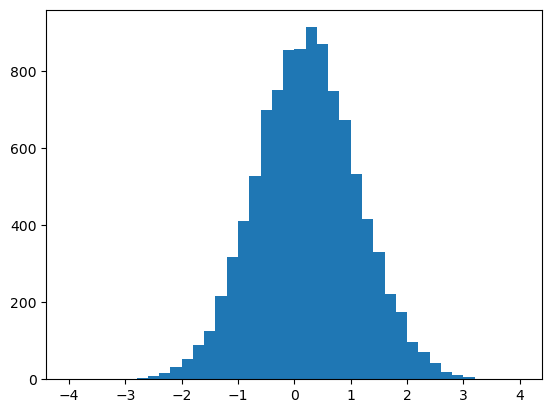

In [9]:
plt.hist( mc_pts1[:,feature_index], bins=hist_nbins, weights=final_push_weights_scaled1, range=[hist_xlow, hist_xhigh] )
plt.show

In [10]:
hist_corr_mat1 = np.zeros( shape=(hist_nbins, hist_nbins) )
hist_cov_mat1 = np.zeros( shape=(hist_nbins, hist_nbins) )

hist_corr_mat2 = np.zeros( shape=(hist_nbins, hist_nbins) )
hist_cov_mat2 = np.zeros( shape=(hist_nbins, hist_nbins) )

hist_corr_mat3 = np.zeros( shape=(hist_nbins, hist_nbins) )
hist_cov_mat3 = np.zeros( shape=(hist_nbins, hist_nbins) )

hist_corr_mat4 = np.zeros( shape=(hist_nbins, hist_nbins) )
hist_cov_mat4 = np.zeros( shape=(hist_nbins, hist_nbins) )

for bi in range(hist_nbins) :
    
    for bj in range( hist_nbins ) :
        
       #---
        
        ccm = np.corrcoef( np.row_stack( ((boot_hist_content1[:,bi], boot_hist_content1[:,bj])) ) )
        cvm =      np.cov( np.row_stack( ((boot_hist_content1[:,bi], boot_hist_content1[:,bj])) ) )
        
        hist_corr_mat1[bi,bj] = ccm[0,1]
        
        hist_cov_mat1[bi,bj] = cvm[0,1]
        
       #---
        
        ccm = np.corrcoef( np.row_stack( ((boot_hist_content2[:,bi], boot_hist_content2[:,bj])) ) )
        cvm =      np.cov( np.row_stack( ((boot_hist_content2[:,bi], boot_hist_content2[:,bj])) ) )
        
        hist_corr_mat2[bi,bj] = ccm[0,1]
        
        hist_cov_mat2[bi,bj] = cvm[0,1]

       #---
        
        ccm = np.corrcoef( np.row_stack( ((boot_hist_content3[:,bi], boot_hist_content3[:,bj])) ) )
        cvm =      np.cov( np.row_stack( ((boot_hist_content3[:,bi], boot_hist_content3[:,bj])) ) )
        
        hist_corr_mat3[bi,bj] = ccm[0,1]
        
        hist_cov_mat3[bi,bj] = cvm[0,1]
        
       #---
        
        ccm = np.corrcoef( np.row_stack( ((boot_hist_content4[:,bi], boot_hist_content4[:,bj])) ) )
        cvm =      np.cov( np.row_stack( ((boot_hist_content4[:,bi], boot_hist_content4[:,bj])) ) )
        
        hist_corr_mat4[bi,bj] = ccm[0,1]
        
        hist_cov_mat4[bi,bj] = cvm[0,1]        
        
        
        
        

<function matplotlib.pyplot.show(close=None, block=None)>

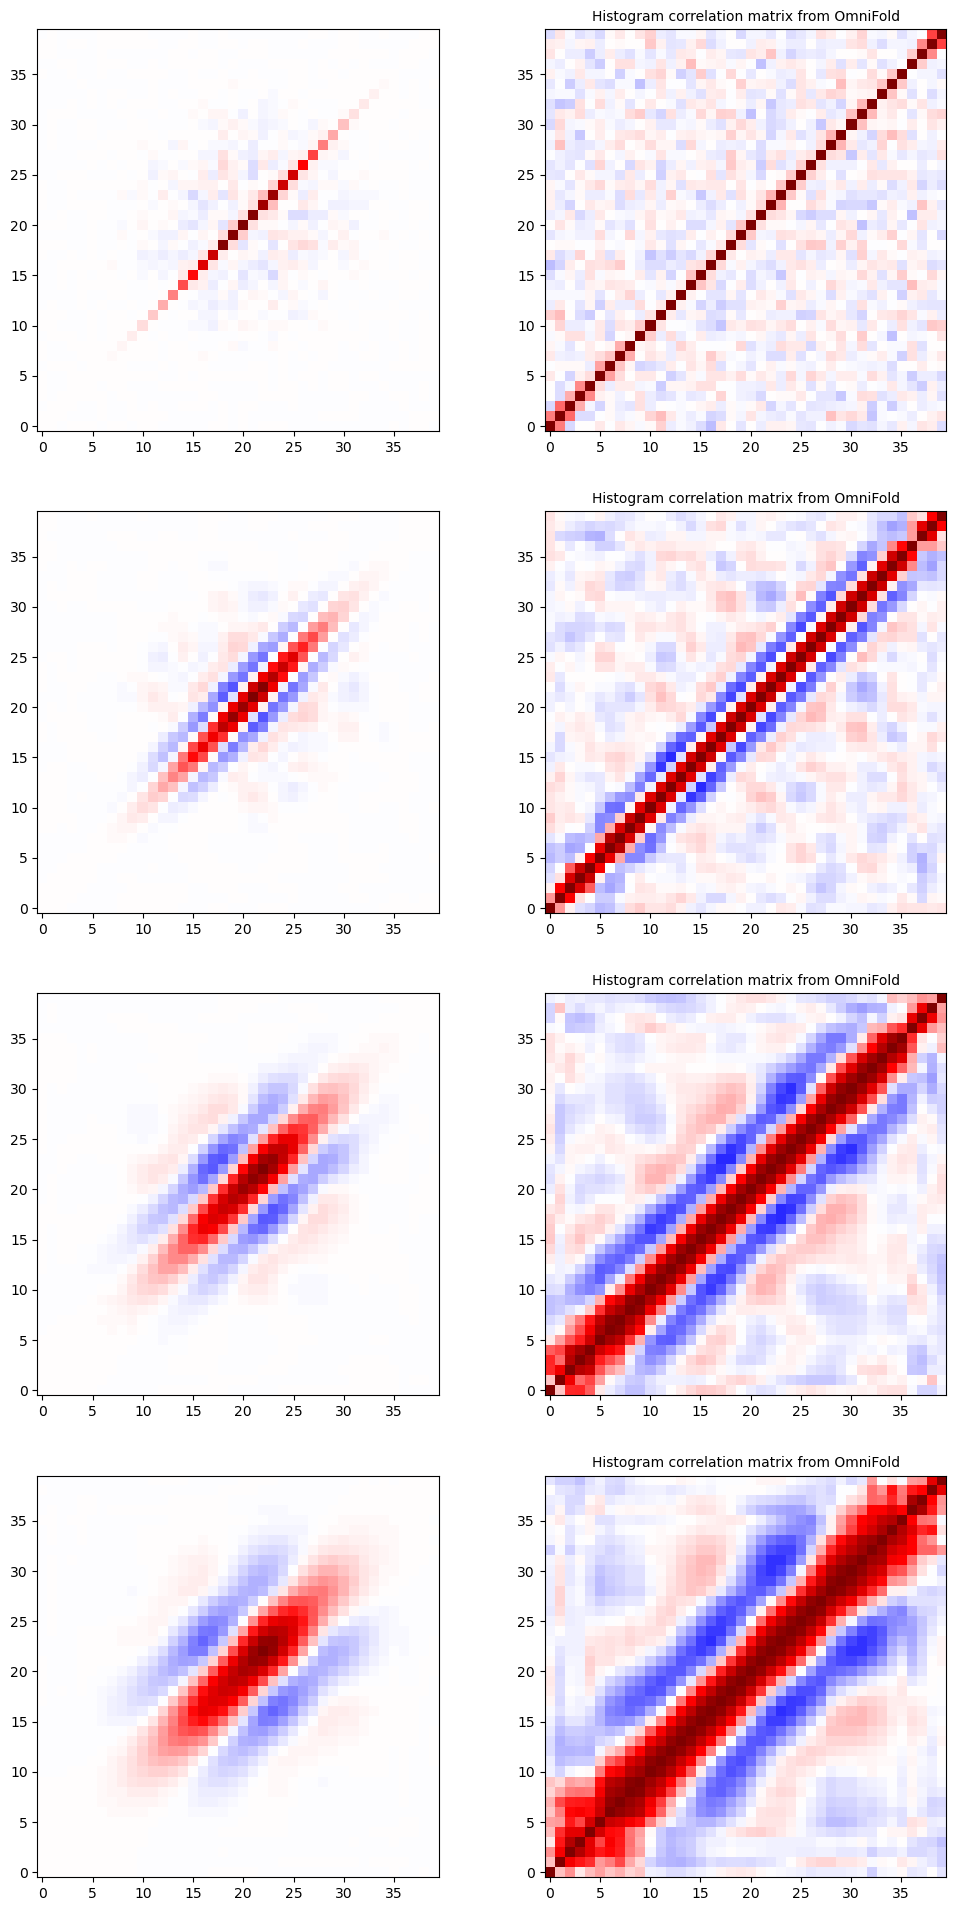

In [11]:
fs = 6

fig,ax = plt.subplots( 4, 2, figsize=(2*fs,4*fs))


#--

axi = ax[0,0]
max_cov_element1 = np.max(hist_cov_mat1)
im_covmat1 = axi.imshow(hist_cov_mat1, origin='lower',
                       vmin=-1*max_cov_element1, vmax=max_cov_element1,
                       cmap='seismic')
#axi.figure.colorbar( im_covmat1, ax=ax[0] )

axi = ax[0,1]
im1 = axi.imshow(hist_corr_mat1, cmap='seismic', origin='lower', vmin=-1, vmax=1)
#axi.figure.colorbar( im1, ax=ax[1] )
axi.set_title('Histogram correlation matrix from OmniFold', fontsize=10)


#--

axi = ax[1,0]
max_cov_element2 = np.max(hist_cov_mat2)
im_covmat1 = axi.imshow(hist_cov_mat2, origin='lower',
                       vmin=-1*max_cov_element2, vmax=max_cov_element2,
                       cmap='seismic')
#axi.figure.colorbar( im_covmat1, ax=ax[0] )

axi = ax[1,1]
im2 = axi.imshow(hist_corr_mat2, cmap='seismic', origin='lower', vmin=-1, vmax=1)
#axi.figure.colorbar( im1, ax=ax[1] )
axi.set_title('Histogram correlation matrix from OmniFold', fontsize=10)


#--

axi = ax[2,0]
max_cov_element3 = np.max(hist_cov_mat3)
im_covmat1 = axi.imshow(hist_cov_mat3, origin='lower',
                       vmin=-1*max_cov_element3, vmax=max_cov_element3,
                       cmap='seismic')
#axi.figure.colorbar( im_covmat1, ax=ax[0] )

axi = ax[2,1]
im3 = axi.imshow(hist_corr_mat3, cmap='seismic', origin='lower', vmin=-1, vmax=1)
#axi.figure.colorbar( im1, ax=ax[1] )
axi.set_title('Histogram correlation matrix from OmniFold', fontsize=10)

#--

axi = ax[3,0]
max_cov_element4 = np.max(hist_cov_mat4)
im_covmat4 = axi.imshow(hist_cov_mat4, origin='lower',
                       vmin=-1*max_cov_element4, vmax=max_cov_element4,
                       cmap='seismic')
#axi.figure.colorbar( im_covmat1, ax=ax[0] )

axi = ax[3,1]
im4 = axi.imshow(hist_corr_mat4, cmap='seismic', origin='lower', vmin=-1, vmax=1)
#axi.figure.colorbar( im1, ax=ax[1] )
axi.set_title('Histogram correlation matrix from OmniFold', fontsize=10)


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

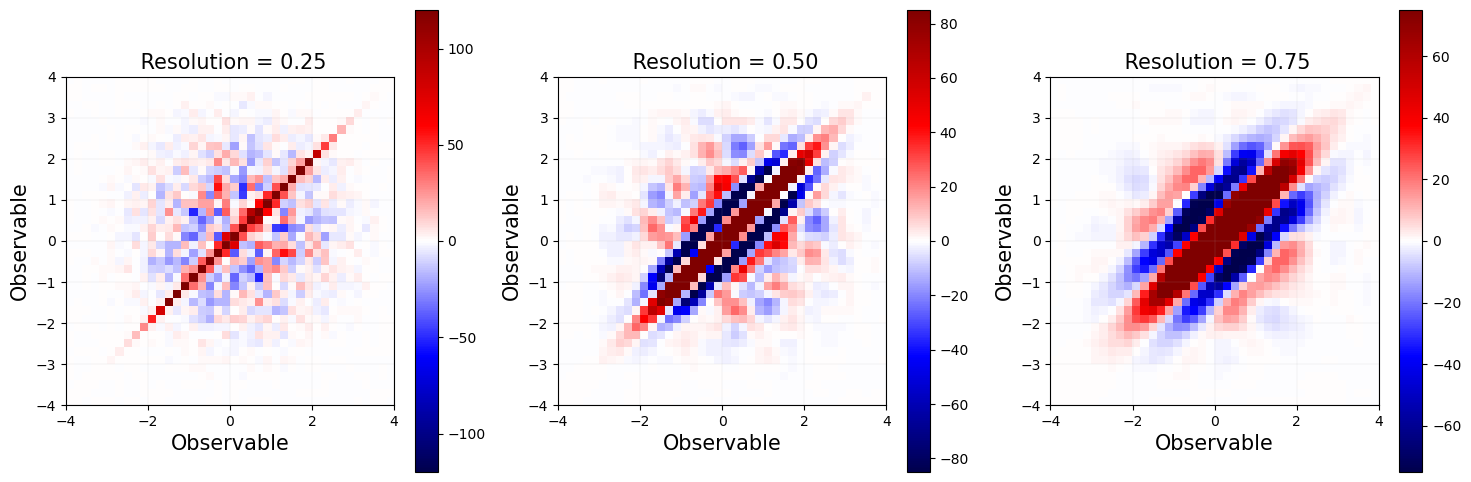

In [12]:
fs = 6

fonts = 15

fig,ax = plt.subplots( 1, 3, figsize=(3*fs,fs))


#---

axi = ax[0]
max_cov_element = np.max(hist_cov_mat1)
im_covmat1 = axi.imshow(hist_cov_mat1, cmap='seismic', origin='lower', 
                         extent=[hist_xlow,hist_xhigh,hist_xlow,hist_xhigh],
                         #vmin=-1*max_cov_element, vmax=max_cov_element,
                         #vmin=-75, vmax=75
                         vmin=-120, vmax=120
                        )
axi.figure.colorbar( im_covmat1, ax=axi )
axi.grid(True, alpha=0.5, linewidth=0.2 )

axi.set_title(' Resolution = 0.25', fontsize=fonts )
axi.set_xlabel( 'Observable', fontsize=fonts )
axi.set_ylabel( 'Observable', fontsize=fonts )


#---

axi = ax[1]
max_cov_element = np.max(hist_cov_mat2)
im_covmat2 = axi.imshow(hist_cov_mat2, cmap='seismic', origin='lower', 
                         extent=[hist_xlow,hist_xhigh,hist_xlow,hist_xhigh],
                         #vmin=-1*max_cov_element, vmax=max_cov_element,
                         #vmin=-45, vmax=45
                         vmin=-85, vmax=85
                        )
axi.figure.colorbar( im_covmat2, ax=axi )
axi.grid(True, alpha=0.5, linewidth=0.2 )

axi.set_title(' Resolution = 0.50', fontsize=fonts )
axi.set_xlabel( 'Observable', fontsize=fonts )
axi.set_ylabel( 'Observable', fontsize=fonts )

#---

axi = ax[2]
max_cov_element = np.max(hist_cov_mat3)
im_covmat3 = axi.imshow(hist_cov_mat3, cmap='seismic', origin='lower', 
                         extent=[hist_xlow,hist_xhigh,hist_xlow,hist_xhigh],
                         #vmin=-1*max_cov_element, vmax=max_cov_element,
                         #vmin=-32, vmax=32 
                         vmin=-75, vmax=75
                       )
axi.figure.colorbar( im_covmat3, ax=axi )
axi.grid(True, alpha=0.5, linewidth=0.2 )

axi.set_title(' Resolution = 0.75', fontsize=fonts )
axi.set_xlabel( 'Observable', fontsize=fonts )
axi.set_ylabel( 'Observable', fontsize=fonts )

if do_nn :
    fname = 'paper-plots/weight-histogram-covariance-1d-nn.pdf'
else :
    fname = 'paper-plots/weight-histogram-covariance-1d.pdf'
    

plt.savefig( fname, bbox_inches='tight' )



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

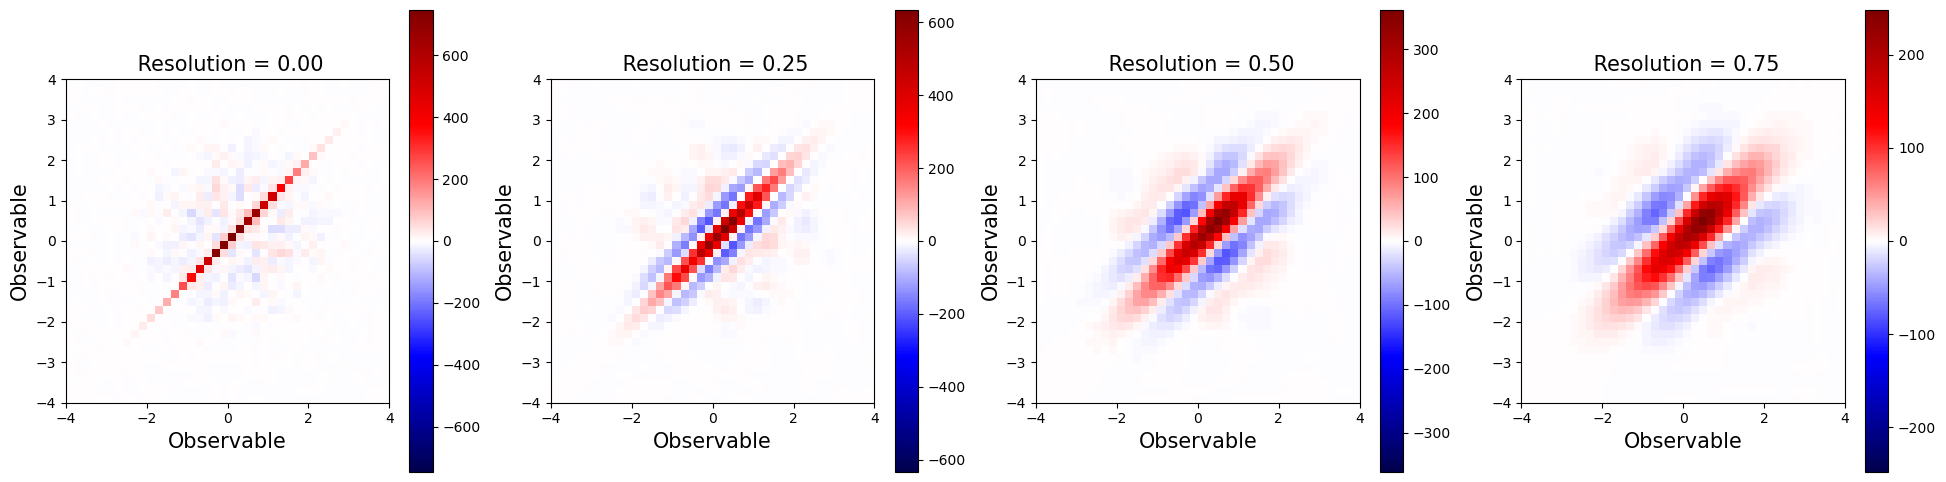

In [13]:
fs = 6

fonts = 15

fig,ax = plt.subplots( 1, 4, figsize=(4*fs,fs))


#---

axi = ax[0]
max_cov_element = np.max(hist_cov_mat1)
im_covmat1 = axi.imshow(hist_cov_mat1, cmap='seismic', origin='lower', 
                         extent=[hist_xlow,hist_xhigh,hist_xlow,hist_xhigh],
                        vmin=-1*max_cov_element, vmax=max_cov_element
                        )
axi.figure.colorbar( im_covmat1, ax=axi )

axi.set_title(' Resolution = 0.00', fontsize=fonts )
axi.set_xlabel( 'Observable', fontsize=fonts )
axi.set_ylabel( 'Observable', fontsize=fonts )


#---

axi = ax[1]
max_cov_element = np.max(hist_cov_mat2)
im_covmat2 = axi.imshow(hist_cov_mat2, cmap='seismic', origin='lower', 
                         extent=[hist_xlow,hist_xhigh,hist_xlow,hist_xhigh],
                        vmin=-1*max_cov_element, vmax=max_cov_element
                        )
axi.figure.colorbar( im_covmat2, ax=axi )

axi.set_title(' Resolution = 0.25', fontsize=fonts )
axi.set_xlabel( 'Observable', fontsize=fonts )
axi.set_ylabel( 'Observable', fontsize=fonts )

#---

axi = ax[2]
max_cov_element = np.max(hist_cov_mat3)
im_covmat3 = axi.imshow(hist_cov_mat3, cmap='seismic', origin='lower', 
                         extent=[hist_xlow,hist_xhigh,hist_xlow,hist_xhigh],
                        vmin=-1*max_cov_element, vmax=max_cov_element
                        )
axi.figure.colorbar( im_covmat3, ax=axi )

axi.set_title(' Resolution = 0.50', fontsize=fonts )
axi.set_xlabel( 'Observable', fontsize=fonts )
axi.set_ylabel( 'Observable', fontsize=fonts )

#---

axi = ax[3]
max_cov_element = np.max(hist_cov_mat4)
im_covmat4 = axi.imshow(hist_cov_mat4, cmap='seismic', origin='lower', 
                         extent=[hist_xlow,hist_xhigh,hist_xlow,hist_xhigh],
                        vmin=-1*max_cov_element, vmax=max_cov_element
                        )
axi.figure.colorbar( im_covmat4, ax=axi )

axi.set_title(' Resolution = 0.75', fontsize=fonts )
axi.set_xlabel( 'Observable', fontsize=fonts )
axi.set_ylabel( 'Observable', fontsize=fonts )



if do_nn :
    fname = 'paper-plots/weight-histogram-covariance-1d-nn.pdf'
else :
    fname = 'paper-plots/weight-histogram-covariance-1d.pdf'
    

plt.savefig( fname, bbox_inches='tight' )


plt.show